In [1]:
## Connectin With Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [3]:
## Importing data from CSV File
data =  pd.read_csv("/content/drive/MyDrive/Uber Fare Prediction/Uber Fare Prediction.csv")
data.shape

(85533, 7)

We have 85533 records with 7 columns

In [4]:
## Printing First Five records of data
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,9.45,2020-12-01 00:02:07 UTC,-73.988903,40.763543,-74.001035,40.739063,1
1,7.74,2020-12-01 00:22:13 UTC,-73.983996,40.760798,-73.989602,40.765511,1
2,36.10,2020-12-01 00:23:00 UTC,-73.966448,40.761890,-73.865239,40.902941,2
3,23.93,2020-12-01 00:25:00 UTC,-73.954238,40.764178,-74.014174,40.716989,1
4,38.39,2020-12-01 00:26:08 UTC,-73.862843,40.768730,-73.988064,40.667163,1


In [5]:
## Changing Datatype of Column "pickup_datetime" to date and getting columns Pickup_day, Pickup_Date and Pickup_Time
data["pickup_datetime"] = data["pickup_datetime"].str.replace("UTC","")
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])
data["Pickup_Date"] = data["pickup_datetime"].dt.date
data["Pickup_Time (Hours)"] = data["pickup_datetime"].dt.hour
data["Pickup_Day"] = data["pickup_datetime"].dt.day_name()

Function to get distance in Kilometer from latitute and Longitude

In [6]:
## Function to get distance in Kilometer from latitute and Longitude
def deg2rad(deg) :
  return deg * (math.pi/180)

import math
def get_distance_in_km(lat1,lon1,lat2,lon2) :
  R = 6371; ## Radius of the earth in km
  Change_in_latitude = deg2rad(lat2-lat1);
  Change_in_longitude = deg2rad(lon2-lon1);
  a =  math.sin(Change_in_latitude/2) * math.sin(Change_in_latitude/2) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) *  math.sin(Change_in_longitude/2) * math.sin(Change_in_longitude/2)
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
  distance = R * c
  return distance

In [7]:
data["Distance(In kilometer)"] = data.apply(lambda x : get_distance_in_km(x["pickup_latitude"], x["pickup_longitude"],x["dropoff_latitude"], x["dropoff_longitude"]), axis=1)

In [8]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Pickup_Date,Pickup_Time (Hours),Pickup_Day,Distance(In kilometer)
0,9.45,2020-12-01 00:02:07,-73.988903,40.763543,-74.001035,40.739063,1,2020-12-01,0,Tuesday,2.907567
1,7.74,2020-12-01 00:22:13,-73.983996,40.760798,-73.989602,40.765511,1,2020-12-01,0,Tuesday,0.705378
2,36.10,2020-12-01 00:23:00,-73.966448,40.761890,-73.865239,40.902941,2,2020-12-01,0,Tuesday,17.846510
3,23.93,2020-12-01 00:25:00,-73.954238,40.764178,-74.014174,40.716989,1,2020-12-01,0,Tuesday,7.282238
4,38.39,2020-12-01 00:26:08,-73.862843,40.768730,-73.988064,40.667163,1,2020-12-01,0,Tuesday,15.457102


In [9]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Pickup_Time (Hours),Distance(In kilometer)
count,85533.000000,85533.000000,85533.000000,85533.000000,85533.000000,85533.000000,85533.000000,85533.000000
mean,14.037139,-72.738819,40.070605,-72.767783,40.087594,1.680112,13.554523,34.968670
std,11.727005,9.478265,5.221449,9.366521,5.160068,1.334410,6.471489,522.167940
min,-18.080000,-78.152136,0.000000,-74.578996,0.000000,0.000000,0.000000,0.000000
25%,7.580000,-73.991858,40.735329,-73.991136,40.734369,1.000000,9.000000,1.210856
50%,10.510000,-73.981569,40.753094,-73.979524,40.753779,1.000000,14.000000,2.099032
75%,15.710000,-73.966208,40.768151,-73.962046,40.768991,2.000000,19.000000,3.901027
max,495.500000,0.000000,46.209969,0.000000,45.191987,6.000000,23.000000,8699.681593


From the above table , we have observed that we have minimum passenger count as 1 and maximum passenger count as 6. Also fare_amount is given negative in some cases.

Removing records where fare_amount , distance or passenger count is given as 0

In [10]:
## Lets Check the no. of records where fare_amount is 0 or negative
print(len(data[data["fare_amount"]<=0]))
data.drop(data[data["fare_amount"]<=0].index, axis = 0, inplace =  True)

25


In [11]:
## Total Records where Distance in Kilometers are 0 and Fare Amount more than 0
print(len(data[(data["Distance(In kilometer)"]<=0) & (data["fare_amount"]>0)] ))
data.drop(data[(data["Distance(In kilometer)"]<=0) & (data["fare_amount"]>0)].index, axis = 0, inplace =  True)

1254


In [12]:
## Total Records where Passenger Count are 0
print(len(data[(data["passenger_count"]<=0)] ))
data.drop(data[(data["passenger_count"]<=0)].index, axis = 0, inplace =  True)

26


Showing frequency distribution and Detecting Outliers From the Fare Amount

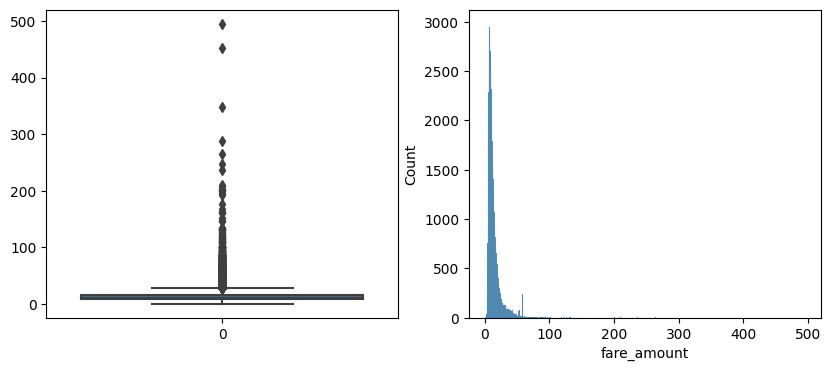

In [13]:
fig,  (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(data["fare_amount"], ax = ax1)
sns.histplot(data["fare_amount"],ax = ax2)
plt.show()

In [14]:
## As most of the data lies where fare_amount is less than 60 So lets check how many records we have where fare_amount is more than 60
print(len(data[data["fare_amount"]>60]))
data.drop(data[(data["fare_amount"]>60)].index, axis = 0, inplace =  True)

369


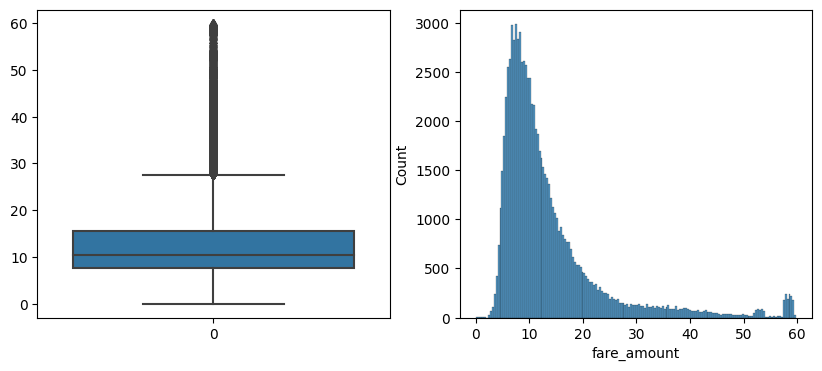

In [15]:
## Plotting Fare Amount after removing some of the outliers
fig,  (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(data["fare_amount"], ax = ax1)
sns.histplot(data["fare_amount"],ax = ax2)
plt.show()

Showing frequency distribution and Detecting Outliers From the Distance(In Kilometer)

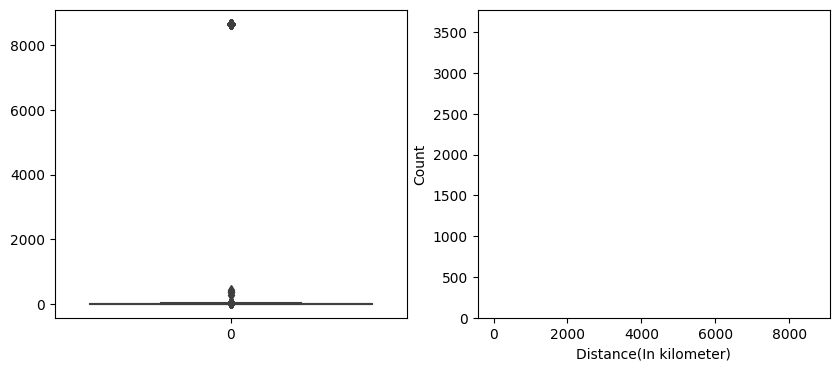

In [16]:
fig,  (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(data["Distance(In kilometer)"], ax = ax1)
sns.histplot(data["Distance(In kilometer)"],ax = ax2)
plt.show()

In [17]:
## Removing records where Distance is more than 100 KM
print(len(data[(data["Distance(In kilometer)"]>100)] ))
data.drop(data[(data["Distance(In kilometer)"]>100)].index, axis = 0, inplace =  True)

304


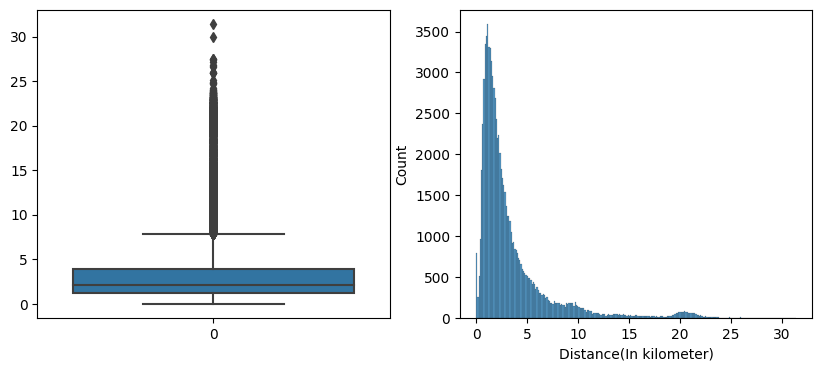

In [18]:
## Plotting Box plot and histogram after removing outliers from the column Distance
fig,  (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(data["Distance(In kilometer)"], ax = ax1)
sns.histplot(data["Distance(In kilometer)"],ax = ax2)
plt.show()

In [19]:
## Lets Check the Top 5  records With Minumm distance
data[["fare_amount","pickup_datetime","Distance(In kilometer)"]].sort_values(by = "Distance(In kilometer)", ascending= True).head(5).reset_index()

,index,fare_amount,pickup_datetime,Distance(In kilometer)
0,5193,4.92,2020-12-13 02:31:00,0.000202
1,37185,4.16,2021-03-03 20:25:45,0.000253
2,59386,3.43,2021-04-26 04:58:17,0.000276
3,59786,3.90,2021-04-27 08:58:32,0.000276
4,38120,14.96,2021-03-06 09:08:39,0.000336


In [20]:
## Lets Check the Top 5  records With Maximum distance
data[["fare_amount","pickup_datetime","Distance(In kilometer)"]].sort_values(by = "Distance(In kilometer)", ascending= False).head(5).reset_index()

,index,fare_amount,pickup_datetime,Distance(In kilometer)
0,43004,11.74,2021-03-18 09:49:29,31.455704
1,32638,11.77,2021-02-20 23:57:27,29.953219
2,9449,57.75,2020-12-23 00:34:55,27.526354
3,8372,57.71,2020-12-20 12:40:00,27.462001
4,12608,58.87,2021-01-01 19:20:32,27.370397


Showing DataTypes of all the column

In [21]:
data.dtypes

fare_amount                      float64
pickup_datetime           datetime64[ns]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
Pickup_Date                       object
Pickup_Time (Hours)                int64
Pickup_Day                        object
Distance(In kilometer)           float64
dtype: object

Checking If it contains any null value

In [22]:
## Check whether we have any null value in our dataset
data.isnull().sum()

fare_amount               0
pickup_datetime           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
passenger_count           0
Pickup_Date               0
Pickup_Time (Hours)       0
Pickup_Day                0
Distance(In kilometer)    0
dtype: int64

In [23]:
## Splitting Data into Training and Test Set into 80:20 ratio
X = data.drop("fare_amount",axis = 1)
y = data["fare_amount"]
X_train, X_test , y_train, y_test =  train_test_split(X,y, test_size = 0.2,random_state = 999)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(66844, 10)
(66844,)
(16711, 10)
(16711,)


Univariate Analysis

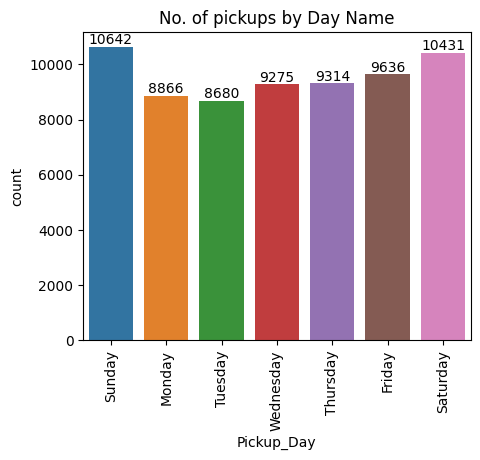

In [24]:
# Univariate Analysis of Column Pickup_Day
plt.figure(figsize = (5,4))
ax = sns.countplot(x = X_train["Pickup_Day"],order = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
plt.title("No. of pickups by Day Name")
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

We have maximum records for pickups on Saturday and Sunday

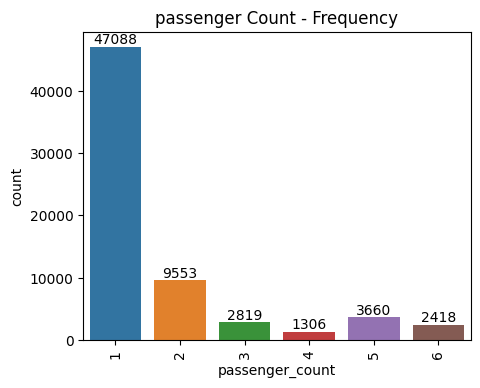

In [25]:
# Plotting Passenger Count Frequency Distribution
plt.figure(figsize = (5,4))
ax = sns.countplot(x = X_train["passenger_count"])
plt.title("passenger Count - Frequency")
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In Most of the rides, we have only 1 Passenger

In [26]:
## Selecting Columns for model training
X_train = X_train.reset_index()
X_test = X_test.reset_index()

X_train = X_train[["passenger_count","Pickup_Time (Hours)","Pickup_Day","Distance(In kilometer)"]]
X_test = X_test[["passenger_count","Pickup_Time (Hours)","Pickup_Day","Distance(In kilometer)"]]

X_train_ = pd.get_dummies(X_train , columns = ["Pickup_Day"])
X_test_ = pd.get_dummies(X_test , columns = ["Pickup_Day"])

## Linear Regression

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train_, y_train)

LinearRegression()

In [28]:
prediction_training_set_lr = lr_model.predict(X_train_)
prediction_test_set_lr = lr_model.predict(X_test_)
print("Mean Squared Errors on Training Set ",(mean_squared_error(y_true = y_train , y_pred = prediction_training_set_lr)))
print("Mean Squared Errors on Test Set ",(mean_squared_error(y_true = y_test , y_pred = prediction_test_set_lr)))
print("Accuracy Scores on Training set ", r2_score(y_train,prediction_training_set_lr))
print("Accuracy Scores on Test set ", r2_score(y_test,prediction_test_set_lr))

Mean Squared Errors on Training Set  15.532114356580834
Mean Squared Errors on Test Set  15.722529736765445
Accuracy Scores on Training set  0.8511407922553618
Accuracy Scores on Test set  0.8440864451780731


In [29]:
print("Intercepts : ", lr_model.intercept_)
pd.DataFrame(index = X_train_.columns ,  data = lr_model.coef_, columns = ["coefficients"])

Intercepts :  4.8141222920974585


,coefficients
passenger_count,0.037800
Pickup_Time (Hours),0.017436
Distance(In kilometer),2.562510
Pickup_Day_Friday,0.364972
Pickup_Day_Monday,-0.638848
Pickup_Day_Saturday,0.304619
Pickup_Day_Sunday,-0.330060
Pickup_Day_Thursday,0.248220
Pickup_Day_Tuesday,-0.186721
Pickup_Day_Wednesday,0.237818


## Decision Tree Regressor

In [30]:
dt_model =DecisionTreeRegressor(max_depth=5, max_features=4,random_state= 999, criterion='squared_error')
dt_model.fit(X_train_,y_train)

DecisionTreeRegressor(max_depth=5, max_features=4, random_state=999)

In [31]:
# Display Feature Importance
pd.DataFrame(index = X_train_.columns , data = dt_model.feature_importances_,columns = ["Importance"] )

,Importance
passenger_count,0.000007
Pickup_Time (Hours),0.001862
Distance(In kilometer),0.997112
Pickup_Day_Friday,0.000006
Pickup_Day_Monday,0.000291
Pickup_Day_Saturday,0.000052
Pickup_Day_Sunday,0.000433
Pickup_Day_Thursday,0.000000
Pickup_Day_Tuesday,0.000238
Pickup_Day_Wednesday,0.000000


In [32]:
prediction_training_set_dt = dt_model.predict(X_train_)
prediction_test_set_dt = dt_model.predict(X_test_)
print("Mean Squared Errors on Training Set ",(mean_squared_error(y_true = y_train , y_pred = prediction_training_set_dt)))
print("Mean Squared Errors on Test Set ",(mean_squared_error(y_true = y_test , y_pred = prediction_test_set_dt)))
print("Accuracy Scores on Training set ", r2_score(y_train,prediction_training_set_dt))
print("Accuracy Scores on Test set ", r2_score(y_test,prediction_test_set_dt))

Mean Squared Errors on Training Set  17.41132409097226
Mean Squared Errors on Test Set  18.08976202691702
Accuracy Scores on Training set  0.8331305158805296
Accuracy Scores on Test set  0.8206116222566878


## Random Forest Regressor

In [33]:
rf_model = RandomForestRegressor(n_estimators=20 , criterion  ="friedman_mse" , max_depth = 5, max_features = 4 ,
                               random_state =999 )
rf_model.fit(X_train_,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=5, max_features=4,
                      n_estimators=20, random_state=999)

In [34]:
prediction_training_set_rf = rf_model.predict(X_train_)
prediction_test_set_rf = rf_model.predict(X_test_)
print("Mean Squared Errors on Training Set ",(mean_squared_error(y_true = y_train , y_pred = prediction_training_set_rf)))
print("Mean Squared Errors on Test Set ",(mean_squared_error(y_true = y_test , y_pred = prediction_test_set_rf)))
print("Accuracy Scores on Training set ", r2_score(y_train,prediction_training_set_rf))
print("Accuracy Scores on Test set ", r2_score(y_test,prediction_test_set_rf))

Mean Squared Errors on Training Set  18.031211518470283
Mean Squared Errors on Test Set  18.458436890598453
Accuracy Scores on Training set  0.827189537773507
Accuracy Scores on Test set  0.816955632442552


## CatBoost Regressor

In [35]:
# Installing CatBoost Library
!pip install catboost
from catboost import CatBoostRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [36]:
# Model defining and training
catboost_model  = CatBoostRegressor(iterations = 200 , learning_rate = 0.05 , random_state = 999 , max_depth = 5 , colsample_bylevel=1,
                           cat_features=["Pickup_Day"] , loss_function="RMSE")
catboost_model.fit(X_train, y_train)

0:	learn: 9.7950627	total: 101ms	remaining: 20.1s
1:	learn: 9.4025605	total: 147ms	remaining: 14.5s
2:	learn: 9.0300657	total: 188ms	remaining: 12.4s
3:	learn: 8.6821840	total: 234ms	remaining: 11.5s
4:	learn: 8.3449583	total: 292ms	remaining: 11.4s
5:	learn: 8.0299141	total: 333ms	remaining: 10.8s
6:	learn: 7.7335116	total: 376ms	remaining: 10.4s
7:	learn: 7.4582337	total: 421ms	remaining: 10.1s
8:	learn: 7.1982769	total: 465ms	remaining: 9.87s
9:	learn: 6.9597103	total: 508ms	remaining: 9.65s
10:	learn: 6.7295528	total: 556ms	remaining: 9.55s
11:	learn: 6.5163621	total: 593ms	remaining: 9.29s
12:	learn: 6.3113251	total: 636ms	remaining: 9.15s
13:	learn: 6.1233237	total: 682ms	remaining: 9.06s
14:	learn: 5.9463931	total: 722ms	remaining: 8.9s
15:	learn: 5.7830830	total: 769ms	remaining: 8.85s
16:	learn: 5.6283625	total: 809ms	remaining: 8.71s
17:	learn: 5.4860151	total: 855ms	remaining: 8.65s
18:	learn: 5.3506970	total: 904ms	remaining: 8.61s
19:	learn: 5.2284918	total: 948ms	remainin

In [37]:
prediction_training_set_catboost = catboost_model.predict(X_train)
prediction_test_set_catboost = catboost_model.predict(X_test)
print("Mean Squared Errors on Training Set ",(mean_squared_error(y_true = y_train , y_pred = prediction_training_set_catboost)))
print("Mean Squared Errors on Test Set ",(mean_squared_error(y_true = y_test , y_pred = prediction_test_set_catboost)))

Mean Squared Errors on Training Set  12.901563579337054
Mean Squared Errors on Test Set  13.47543269829524


In [38]:
print("Accuracy Scores on Training set ", r2_score(y_train,prediction_training_set_catboost))
print("Accuracy Scores on Test set ", r2_score(y_test,prediction_test_set_catboost))

Accuracy Scores on Training set  0.8763518933097807
Accuracy Scores on Test set  0.8663699385575419


XGBoost Regressor

In [39]:
from xgboost import XGBRegressor

In [40]:
xgb_model =  XGBRegressor(booster = "gbtree" ,verbosity = 1 ,n_estimators=200, learning_rate = 0.05 , random_state = 999 , max_depth = 5 , colsample_bytree=1,
                                colsample_bylevel=1,colsample_bynode=1, eval_metric = "rmse")
xgb_model.fit(X_train_, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=999, ...)

In [41]:
prediction_training_set_xgboost = xgb_model.predict(X_train_)
prediction_test_set_xgboost = xgb_model.predict(X_test_)
print("Mean Squared Errors on Training Set ",(mean_squared_error(y_true = y_train , y_pred = prediction_training_set_xgboost)))
print("Mean Squared Errors on Test Set ",(mean_squared_error(y_true = y_test , y_pred = prediction_test_set_xgboost)))

Mean Squared Errors on Training Set  11.428690168636969
Mean Squared Errors on Test Set  13.526002277793962


In [42]:
print("Accuracy Scores on Training set ", r2_score(y_train,prediction_training_set_xgboost))
print("Accuracy Scores on Test set ", r2_score(y_test,prediction_test_set_xgboost))

Accuracy Scores on Training set  0.890467857433626
Accuracy Scores on Test set  0.8658684618208143


In [43]:
## Test Accouracy on different models
pd.DataFrame(index = ["Linear Regression","Decision Tree","Random Forest", "CatBoost","XGBoost"],
                      data = (r2_score(y_test,prediction_test_set_lr),
                              r2_score(y_test,prediction_test_set_dt),
                              r2_score(y_test,prediction_test_set_rf),
                              r2_score(y_test,prediction_test_set_catboost),
                              r2_score(y_test,prediction_test_set_xgboost)
                              ), columns = ["Test Accuracy"])

,Test Accuracy
Linear Regression,0.844086
Decision Tree,0.820612
Random Forest,0.816956
CatBoost,0.866370
XGBoost,0.865868
